In [1]:
#import libraries needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

# Direct methods for the solution of Linear Systems

Given a matrix A ∈ nxn and the vector $x_{true}$ = $(1, 1, ... , 1)^T$ ∈ $R^n$, write a script that:
- Computes the right-hand side of the linear system b = A $x_{true}$.
- Computes the condition number in 2-norm and the ∞-norm of the matrix A.
- Solves the linear system Ax = b.
- Computes the relative error between the solution computed before and the true solution $x_{true}$.
- Plot a graph with the relative errors as a function of n and the condition number in 2-norm K2(A) and in ∞-norm, as a function of n.

In [2]:
def linear_system(A, x_true):
    b = A@x_true               

    cond_2 = np.linalg.cond(A, 2)              
    cond_inf = np.linalg.cond(A, np.Infinity)  

    x = np.linalg.solve(A, b)   

    relative_error = np.linalg.norm(x-x_true, 2)/np.linalg.norm(x_true, 2)  

    return relative_error, cond_2, cond_inf

def plot(relative_error, cond_2, cond_inf, n_vector):
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    plt.title("Relative error")
    plt.plot(n_vector, relative_error)  
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.title("Condition numbers")
    plt.plot(n_vector, cond_2, '-', color='blue')           
    plt.plot(n_vector ,cond_inf, '-', color='orange')       
    plt.legend(['cond_2', 'cond_inf'])

    plt.grid()
    plt.show()

Test the program above with the following choices of A ∈ R nxn:

##### A random matrix with size varying with n = {10, 20, 30, ... , 100}

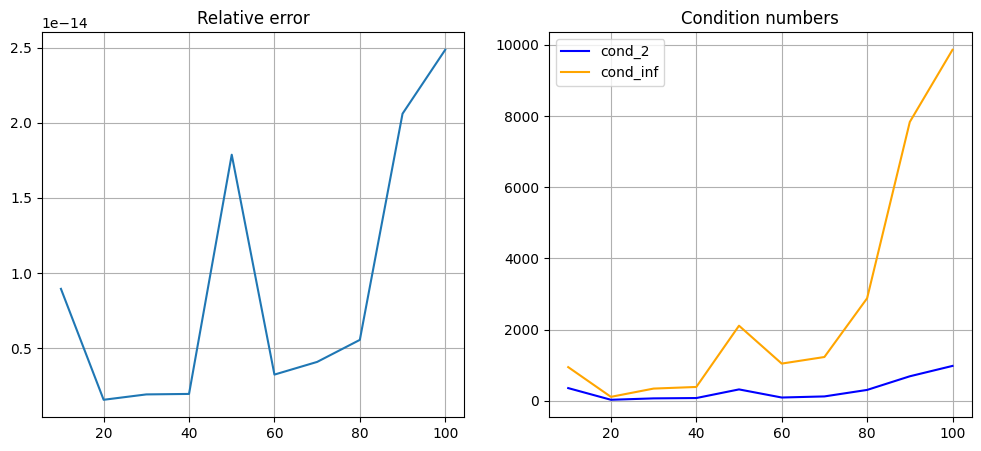

In [3]:
n_vector = np.arange(10, 101, 10)

#Initialize lists for the results
error_vector = []
k2_vector = []
kinf_vector = []

for n in n_vector:
    A = np.random.randn(n,n)    #define the random transformation matrix
    x_true = np.ones((n,))      
    err, k2, kinf = linear_system(A, x_true)
    error_vector.append(err)
    k2_vector.append(k2)
    kinf_vector.append(kinf)

plot(error_vector, k2_vector, kinf_vector, n_vector)

##### The Vandermonde matrix (np.vander) of dimension n = {5, 10, 15 20, 25, 30} with respect to the vector x = {1, 2, 3, ... , n}.

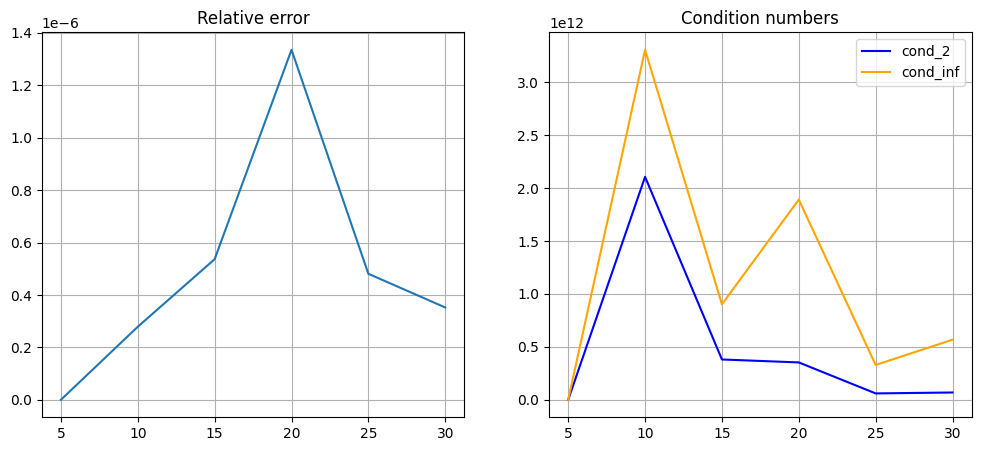

In [4]:
n_vector = np.array([5, 10, 15, 20, 25, 30])

#Initialize lists for thre results
error_vector = []
k2_vector = []
kinf_vector = []

for n in n_vector:
    x_vector = np.arange(1, n+1, 1)
    A = np.vander(x_vector)         
    x_true = np.ones((n,))          

    err, k2, kinf = linear_system(A, x_true)

    error_vector.append(err)
    k2_vector.append(k2)    
    kinf_vector.append(kinf)
    
plot(error_vector, k2_vector, kinf_vector, n_vector)

##### The Hilbert matrix (scipy.linalg.hilbert) of dimension n = {4, 5, 6, ... , 12}.

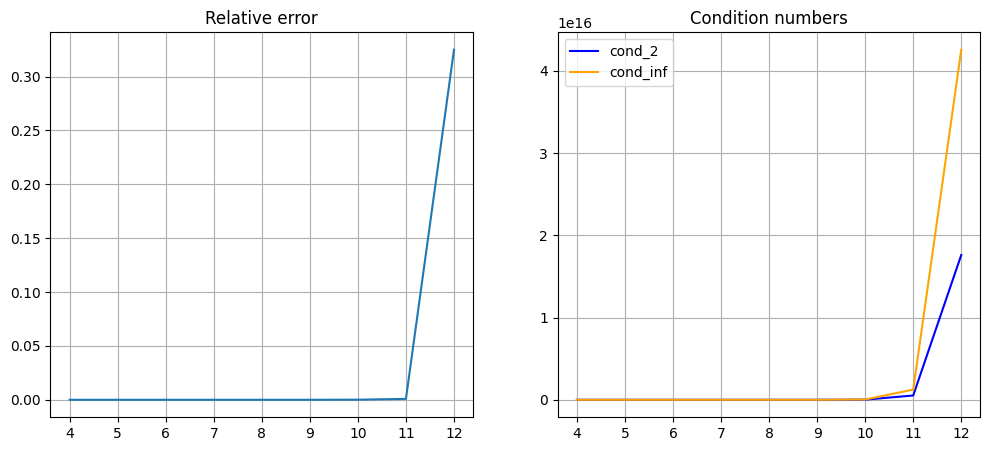

In [5]:
n_vector = np.arange(4, 12+1, 1)

#Initialize lists for the results
error_vector = []
k2_vector = []
kinf_vector = []

for n in n_vector:

    A = scipy.linalg.hilbert(n)     
    x_true = np.ones((n,))          

    err, k2, kinf = linear_system(A, x_true)

    error_vector.append(err)
    k2_vector.append(k2)    
    kinf_vector.append(kinf)
    
plot(error_vector, k2_vector, kinf_vector, n_vector)

# Floating point arithmetic

## 1. 
The Machine epsilon $\epsilon$ is the distance between 1 and the next floating point number. 
Compute $\epsilon$, which is defined as the smallest floating point number such that it holds:
    $fl(1 + \epsilon) > 1$
    
Tips: use a while structure.

In [6]:
machine_epsilon = np.asarray([1], np.float32)

while 1.0 + machine_epsilon > 1.0:
    machine_epsilon = machine_epsilon/2

machine_epsilon = machine_epsilon*2     

print(f"Single precision: {machine_epsilon[0]}")

machine_epsilon = np.asarray([1],np.float64)

while 1.0 + machine_epsilon > 1.0:
    machine_epsilon = machine_epsilon/2

machine_epsilon = machine_epsilon*2     

print(f"Double precision: {machine_epsilon[0]}")

Single precision: 1.1920928955078125e-07
Double precision: 2.220446049250313e-16


## 2. 
Let's consider the sequence $a_n=(1+1/n)^n$. It is well known that: $\lim_{n \to \infty} a_n = e$
where e is the Euler costant. <br>
Choose different values for n, compute $a_n$ and compare it to the real value of the Euler costant. <br>

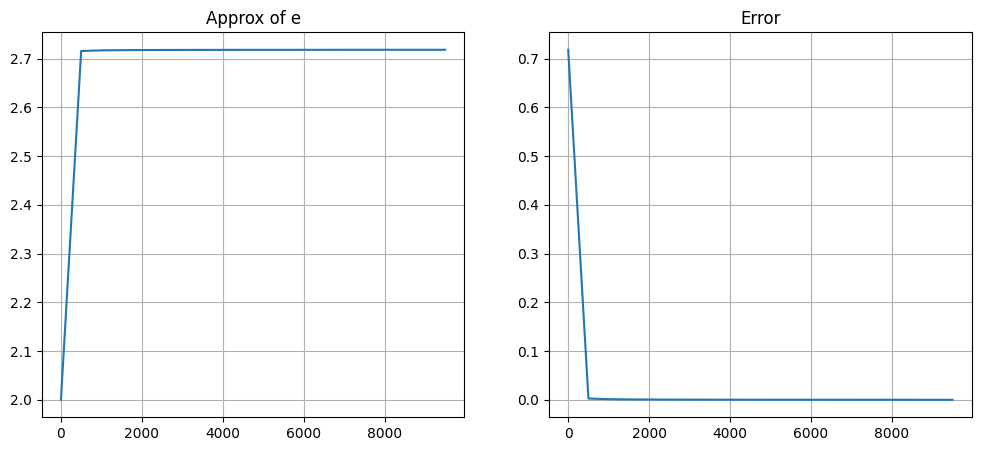

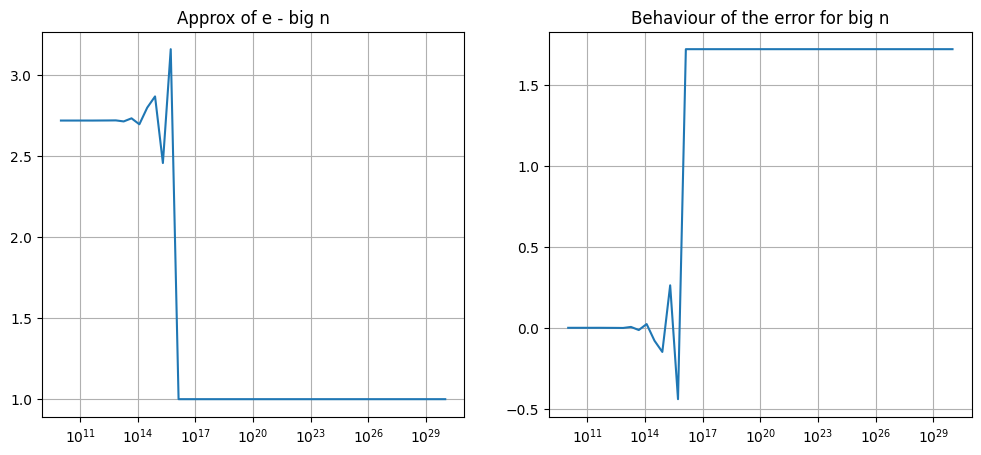

In [13]:
n_vector = np.arange(1,10000,500)    
errors = []
e_ = []

for n in n_vector:
    a_n = (1 + 1/n)**n
    e_.append(a_n)
    errors.append((np.e - a_n))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Approx of e')
plt.plot(n_vector, e_)
plt.grid()

plt.subplot(1,2,2)
plt.title('Error')
plt.plot(n_vector, errors)
plt.grid()

plt.show()

#Large value of n
exp = np.linspace(10, 30)
n_vector_big = [10**e for e in exp]
errors_big = []
e_big = []

for n in n_vector_big:
    a_n = ((1 + 1/n)**n)
    e_big.append(a_n)
    errors_big.append((np.e - a_n))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Approx of e - big n')
plt.xscale("log")
plt.plot(n_vector_big, e_big)
plt.grid()

plt.subplot(1,2,2)
plt.title('Behaviour of the error for big n')
plt.xscale("log")
plt.plot(n_vector_big, errors_big)
plt.grid()

plt.show()

## 3.
Let’s consider the matrices:

$A=\begin{pmatrix}
4 & 2\\
1 & 3
\end{pmatrix}
,\;
B=\begin{pmatrix}
4 & 2\\
2 & 1
\end{pmatrix}$

Compute the rank of A and B and their eigenvalues. 
- Are A and B full-rank matrices? 
- Can you infer some relationship between the values of the eigenvalues and the full-rank condition? 

In [ ]:
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)

eigenvalues_A = np.linalg.eigvals(A)
eigenvalues_B = np.linalg.eigvals(B)

print(f"Eigenvalues of A = {eigenvalues_A} - Rank of A = {rank_A}")
if rank_A == 2:
    print("A is a full-rank matrix")
else:
    print("A is not a full-rank matrix")

print(f"Eigenvalues of B = {eigenvalues_B} - Rank of B = {rank_B}")
if rank_B == 2:
    print("B is a full-rank matrix")
else:
    print("B is not a full-rank matrix")

Eigenvalues of A = [5. 2.] - Rank of A = 2
A is a full-rank matrix
Eigenvalues of B = [5. 0.] - Rank of B = 1
B is not a full-rank matrix


In [ ]:
def full_rank(A):
    Eig = np.linalg.eigvals(A)
    r = np.linalg.matrix_rank(A)
    max_rank = A.shape[0]

    print(f"Eigenvalues = {Eig} - Rank = {r}")
    if r == max_rank:
        print("full-rank matrix")
    else:
        print("not a full-rank matrix")


A = np.array([[1,2,3],[0,0,0],[1,2,3]])
full_rank(A)

A = np.array([[1, 2], [1, 2]])
full_rank(A)

A = np.array([[3,2,1],[4,5,2],[7,6,1]])
full_rank(A)

Eigenvalues = [0. 4. 0.] - Rank = 1
not a full-rank matrix
Eigenvalues = [0. 3.] - Rank = 1
not a full-rank matrix
Eigenvalues = [ 9.29150262  1.         -1.29150262] - Rank = 3
full-rank matrix
